# Deep learning
## Homework1
## Amirreza Hatamipour
### 97101507
## Qustion 1


## Import all libarary as we need:  

In [1]:
#import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.compat.v1 as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import  os

## section a : read  dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data_train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_HW1/Q1_train.csv")
data_test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep_HW1/Q1_test.csv")
train=data_train.to_numpy()
test=data_test.to_numpy()

### first show 25 number of data with their label

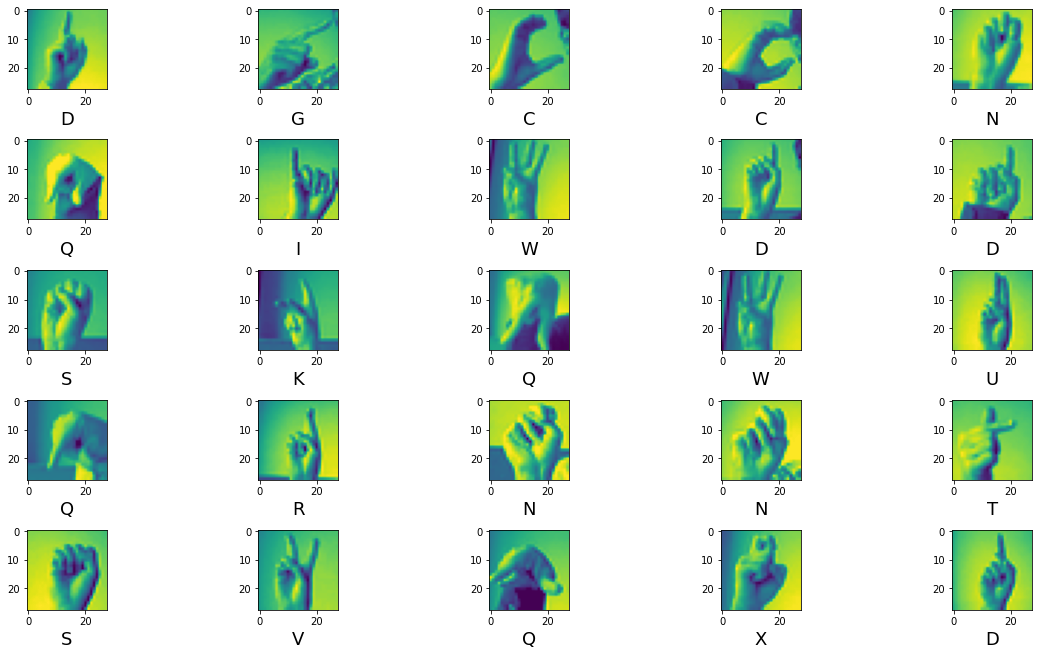

In [5]:
alphabet=['A' , 'B','C','D','E','F','G','H','I','j','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
fig, axs = plt.subplots(5, 5,figsize=(16,9),constrained_layout=True)
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(train[5*i+j,1:].reshape((28,28)))
        axs[i, j].set_xlabel(alphabet[train[5*i+j,0]], fontsize=18)


## section b:
>> Note that I test for different model structures, but the primary model is in [section b.4]( https://colab.research.google.com/drive/11WDodQWdK-RTZA32vMQ3f6ASbyRjlOTv#scrollTo=2R0eFS1Ir6u7)
### now separate train & validation data and X , Y for train, test and validation also add noise & rotate some train data 
### take 30% of data for validation 
### note that we should normalize input data 


In [6]:
x_test=test[:,1:]/255.0
y_test=test[:,0]
x_train=train[:,1:]/255.0
y_train=train[:,0]

# separate 30% of train data for validation
num_test=x_test.shape[0]
num_valid=int(0.3*x_train.shape[0])
num_train=x_train.shape[0]-num_valid

x_valid=x_train[num_train:]
y_valid=y_train[num_train:]

x_train=x_train[0:num_train]
y_train=y_train[0:num_train]
# data argument
idx = np.random.randint(num_train, size=1000)
for i in idx:
      x_train[i, :]=np.rot90(x_train[i, :].reshape((28,28))).reshape((1,784))
idx = np.random.randint(num_train, size=1000)
for i in idx:
      x_train[i, :]=np.rot90(x_train[i, :].reshape((28,28)),3).reshape((1,784))
# add noise
x_train=x_train+0.005*(0.5-np.random.rand(19219, 784))
##
y_train_hot=tf.Session().run(tf.one_hot(y_train,25))
y_valid_hot=tf.Session().run(tf.one_hot(y_valid,25))
y_test_hot=tf.Session().run(tf.one_hot(y_test,25))
tf.Session().close()

# show dimention of our data
print('Train inputs dimension:')
print(x_train.shape)
print('Validation inputs dimension:')
print(x_valid.shape)
print('Test inputs dimension:')
print(x_test.shape)
print('Train labels dimension:')
print(y_train_hot.shape)
print('Validation labels dimension:')
print(y_valid_hot.shape)
print('Test labels dimension:')
print(y_test_hot.shape)

Train inputs dimension:
(19219, 784)
Validation inputs dimension:
(8236, 784)
Test inputs dimension:
(7172, 784)
Train labels dimension:
(19219, 25)
Validation labels dimension:
(8236, 25)
Test labels dimension:
(7172, 25)


 For preventing bias in the network, shuffle train data.

In [7]:
x_train_shaffle=tf.Session().run(tf.random.shuffle(x_train, seed=12321 ))
y_train_shaffle=tf.Session().run(tf.random.shuffle(y_train_hot, seed=12321))

## define functions that we need:

In [8]:
def WEIGHTS(shape, name,Stddev) :
    return tf.get_variable(dtype=tf.float32, shape=shape,name='W_'+name,
                  initializer=tf.truncated_normal_initializer(stddev=Stddev))

In [9]:
def BIAS (shape, name):
    return tf.get_variable(dtype=tf.float32 , name='B_'+name,
                  initializer=tf.random_normal([shape]))

In [10]:
def FC(X, num_units, name, Stddev,relu=False):
    in_dim=X.get_shape()[1]
    W=WEIGHTS((in_dim, num_units), name,Stddev)
    B=BIAS ((num_units), name)
    H=tf.matmul(X,W)
    O=tf.add(H,B)
    if relu==True:
        return tf.nn.relu(O),W
    return O,W

In [60]:
def mean_var(weights,epochs):
  weight = np.array(weights1)
  weight_mean=np.zeros((1,epochs))
  weight_var=np.zeros((1,epochs))
  for i in range(epochs):
    weight_mean[0,i]=np.mean(weight[i,:,:])
    weight_var[0,i]=np.std(weight[i,:,:])
  return weight_mean,weight_var

## now define hyperparameters for our network.
## first cosider a one layer MLP ( one input layer, zero hidden layer, one output layer)
# b.1.first model: one layer MLP with ADAM optimizer

In [61]:
Stddev=0.001
num_class=25
#starter_learning_rate=0.001
#LR= tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)  
LR=0.001
batchsize=128
epochs=50
normal_std=0.001
input_size=len(x_train[0])

 Neural Network  ( Graph Phase ):

In [62]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')

FC1,weight1=FC(input_image, num_class, 'FC1',Stddev, relu=False)

output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())
#logdir = os.path.join("logs",  tf.get_default_graph())

 Neural Network ( Graph Phase ) - Optimization & measurment


In [63]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC1,
                                            name='LOSS'))

adam=tf.train.AdamOptimizer(
    learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=False,
    name='Adam'
).minimize(loss)
accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC1,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC1,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)


INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


Neural Network ( Session Phase )  


In [64]:
sess = tf.InteractiveSession()
plot_valid=[]
plot_train=[]
weights=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
        if i%50==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    plot_valid.append(sess.run(loss,feed_dict=f_valid))
    plot_train.append(sess.run(loss,feed_dict=f))
    weights.append(sess.run(weight1,feed_dict=f_valid))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.36 	 Training Accuracy=0.0391
iter 50: 	 Loss=2.86 	 Training Accuracy=0.1641
iter 100: 	 Loss=2.61 	 Training Accuracy=0.3281
--------------------------------------------------
Epoch:0 	 Validation Loss:2.35 	 Validation Accuracy=0.4085
--------------------------------------------------
=================== Epoch=1 ===================== 
iter 0: 	 Loss=2.46 	 Training Accuracy=0.3281
iter 50: 	 Loss=2.36 	 Training Accuracy=0.4141
iter 100: 	 Loss=2.14 	 Training Accuracy=0.4297
--------------------------------------------------
Epoch:1 	 Validation Loss:1.96 	 Validation Accuracy=0.5219
--------------------------------------------------
=================== Epoch=2 ===================== 
iter 0: 	 Loss=2.10 	 Training Accuracy=0.4688
iter 50: 	 Loss=2.11 	 Training Accuracy=0.4297
iter 100: 	 Loss=1.87 	 Training Accuracy=0.5234
--------------------------------------------------
Epoch:2 	 Validation Loss:1.72 	 Validat

Text(0.5, 1.0, 'means of weights')

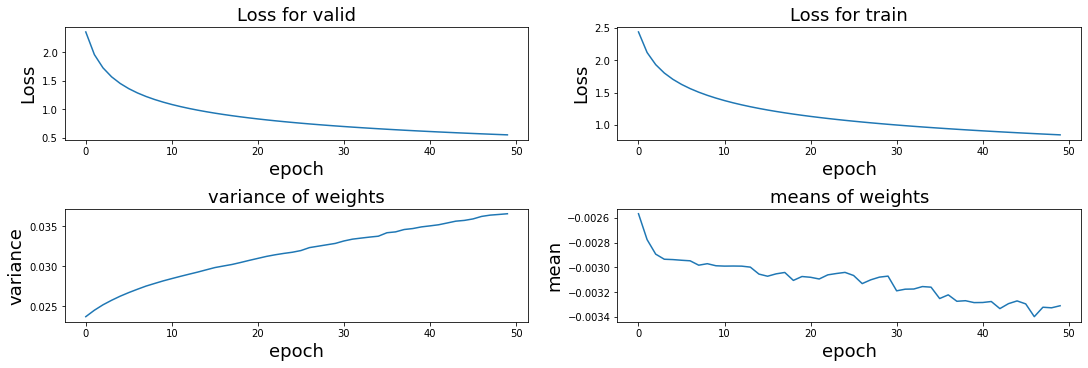

In [67]:
weight_mean,weight_var= mean_var(weights,epochs)
#plot
fig, axs = plt.subplots(2, 2,figsize=(15,5),constrained_layout=True)

axs[0,0].plot(range(epoch+1),plot_valid)
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid', fontsize=18)

axs[ 0,1].plot(range(epoch+1),plot_train)
axs[0, 1].set_xlabel('epoch', fontsize=18)
axs[ 0,1].set_ylabel('Loss', fontsize=18)
axs[ 0,1].set_title('Loss for train', fontsize=18)

axs[1,0].plot(range(epochs),weight_var[0,:])
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('variance', fontsize=18)
axs[1,0].set_title('variance of weights', fontsize=18)

axs[ 1,1].plot(range(epochs),weight_mean[0,:])
axs[ 1,1].set_xlabel('epoch', fontsize=18)
axs[ 1,1].set_ylabel('mean', fontsize=18)
axs[1, 1].set_title('means of weights', fontsize=18)

now run our MLP for test data:

In [ ]:
f_test={input_image:x_test , 
            output_image:y_test_hot}
print('--------------------------------------------------')
print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
print('--------------------------------------------------')

# b.1.1 conclusion for first model:
## as we can see we reach to this result:
> ## model: 1-layer MLP with ADAM  optimizer without dropout

>> *   Batch size=128
*   epoch=50

Loss               | Accuracy 
-------------------|------------------
test:    1.02      | 0.6920
Valid :0.35   | 0.9394
train: 0.35|0.9453


## We see loss function in both training and validation data are descending, and the variance of weights is ascending.The mean of weights is descending




# b.2. second model: 1-layer MLP with SGD optimizer
## define Hyper parameters & input, output layer

In [17]:
Stddev=0.001
num_class=25
LR=0.001
batchsize=128
epochs=100
normal_std=0.001
input_size=len(x_train[0])


Neural Network ( Graph Phase ):

In [18]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')

FC1,weight1=FC(input_image, num_class, 'FC1',Stddev, relu=False)

output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())



 Neural Network ( Graph Phase ) - Optimization & measurment


In [19]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC1,
                                            name='LOSS'))
GSD=tf.train.GradientDescentOptimizer (
   learning_rate=LR, name='GSD'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC1,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC1,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


Neural Network ( Session Phase )  


In [21]:
sess = tf.InteractiveSession()
plot_valid=[]
plot_train=[]
weights=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(GSD,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    plot_valid.append(sess.run(loss,feed_dict=f_valid))
    plot_train.append(sess.run(loss,feed_dict=f))
    weights.append(sess.run(weight1,feed_dict=f_valid))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.69 	 Training Accuracy=0.0547
iter 50: 	 Loss=3.38 	 Training Accuracy=0.0312
iter 100: 	 Loss=3.23 	 Training Accuracy=0.0312
--------------------------------------------------
Epoch:0 	 Validation Loss:3.22 	 Validation Accuracy=0.0610
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:3.18 	 Validation Accuracy=0.0630
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:3.16 	 Validation Accuracy=0.0803
--------------------------------------------------
=================== Epoch=3 ===================== 
--------------------------------------------------
Epoch:3 	 Validation Loss:3.14 	 Validation Accuracy=0.0971
--------------------------------------------------
====

Text(0.5, 1.0, 'means of weights')

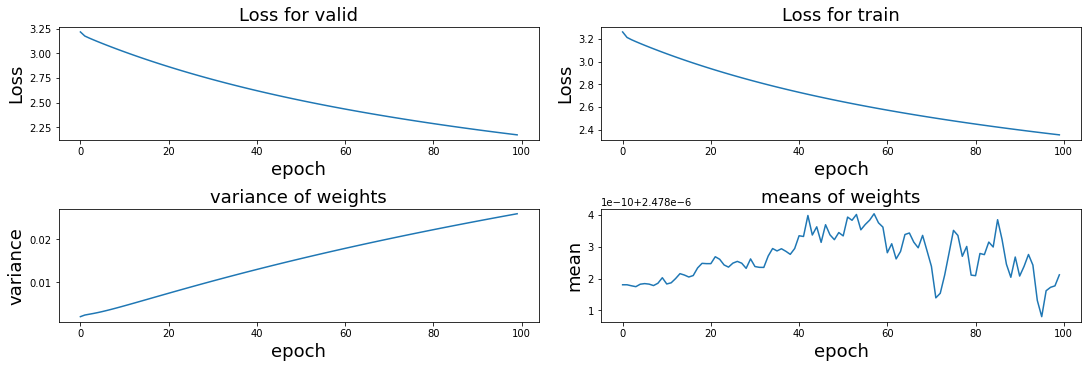

In [22]:

weight_mean,weight_var= mean_var(weights,epochs)

fig, axs = plt.subplots(2, 2,figsize=(15,5),constrained_layout=True)

axs[0,0].plot(range(epoch+1),plot_valid)
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid', fontsize=18)

axs[ 0,1].plot(range(epoch+1),plot_train)
axs[0, 1].set_xlabel('epoch', fontsize=18)
axs[ 0,1].set_ylabel('Loss', fontsize=18)
axs[ 0,1].set_title('Loss for train', fontsize=18)

axs[1,0].plot(range(epochs),weight_var[0,:])
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('variance', fontsize=18)
axs[1,0].set_title('variance of weights', fontsize=18)

axs[ 1,1].plot(range(epochs),weight_mean[0,:])
axs[ 1,1].set_xlabel('epoch', fontsize=18)
axs[ 1,1].set_ylabel('mean', fontsize=18)
axs[1, 1].set_title('means of weights', fontsize=18)

now run our MLP for test data:

In [23]:
f_test={input_image:x_test , 
            output_image:y_test_hot}
print('--------------------------------------------------')
print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
print('--------------------------------------------------')

--------------------------------------------------
 Test Loss:2.27 	 Test Accuracy=0.4750
--------------------------------------------------


#b.2.1 conclusion for second model:
## as we can see we reach to this result:
> ## model: 1-layer MLP with SGD optimizer without dropout

>> *   Batch size=128
*   epoch=100

Loss               | Accuracy 
-------------------|------------------
test:    2.19      | 0.4964
Valid :2.08   | 0.5965
train: 2.12|0.6094


In comparison to the previous method, we have less accuracy in this case!




#b.3. Third model: Two layer(1-hidden,1-output) MLP with ADAM optimizer
define Hyper parameters & input, output layer

In [24]:
starter_learning_rate=0.0009
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
LR=0.0009
batchsize=128
epochs=45
normal_std=0.002

Neural Network ( Graph Phase ):

In [25]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')
stddev=(1/tf.sqrt(float(input_size)))
FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer1)))
FC2,weight2=FC(FC1, num_class, 'FC2',Stddev, relu=False)
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())
#logdir = os.path.join("logs",  tf.get_default_graph())

 Neural Network ( Graph Phase ) - Optimization & measurment


In [26]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC2,
                                            name='LOSS'))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 10, 0.85, staircase=True)
adam=tf.train.AdamOptimizer(
    learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=True,
    name='Adam'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC2,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC2,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


Neural Network ( Session Phase )  


In [36]:
sess = tf.InteractiveSession()
plot_valid=[]
plot_train=[]
weights1=[]
weights2=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    f_test={input_image:x_test , 
            output_image:y_test_hot}
    print('--------------------------------------------------')
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    #plot_weights()
    plot_valid.append(sess.run(loss,feed_dict=f_valid))
    plot_train.append(sess.run(loss,feed_dict=f))
    weights1.append(sess.run(weight1,feed_dict=f_valid))
    weights2.append(sess.run(weight2,feed_dict=f_valid))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.42 	 Training Accuracy=0.0859 
iter 50: 	 Loss=2.70 	 Training Accuracy=0.2734 
iter 100: 	 Loss=2.13 	 Training Accuracy=0.4375 
--------------------------------------------------
Epoch:0 	 Validation Loss:1.79 	 Validation Accuracy=0.4874
--------------------------------------------------
--------------------------------------------------
 Test Loss:1.90 	 Test Accuracy=0.4505
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:1.36 	 Validation Accuracy=0.6223
--------------------------------------------------
--------------------------------------------------
 Test Loss:1.56 	 Test Accuracy=0.5439
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:1.13 	 Validation

Text(0.5, 1.0, 'means of weights')

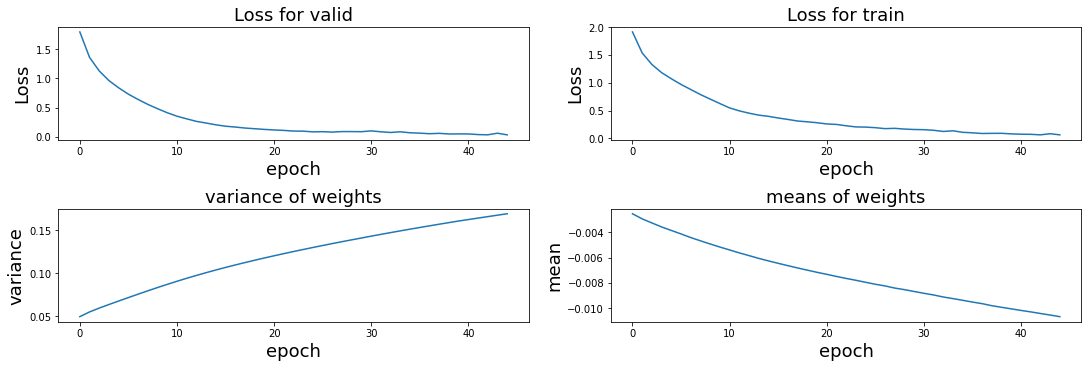

In [38]:
weight1_mean,weight1_var= mean_var(weights1,epochs)
weight2_mean,weight2_var= mean_var(weights2,epochs)


fig, axs = plt.subplots(2, 2,figsize=(15,5),constrained_layout=True)

axs[0,0].plot(range(epoch+1),plot_valid)
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid', fontsize=18)

axs[ 0,1].plot(range(epoch+1),plot_train)
axs[0, 1].set_xlabel('epoch', fontsize=18)
axs[ 0,1].set_ylabel('Loss', fontsize=18)
axs[ 0,1].set_title('Loss for train', fontsize=18)

axs[1,0].plot(range(epochs),weight1_var[0,:]+weight2_var[0,:])
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('variance', fontsize=18)
axs[1,0].set_title('variance of weights', fontsize=18)

axs[ 1,1].plot(range(epochs),weight1_mean[0,:]+weight2_mean[0,:])
axs[ 1,1].set_xlabel('epoch', fontsize=18)
axs[ 1,1].set_ylabel('mean', fontsize=18)
axs[1, 1].set_title('means of weights', fontsize=18)

now run our MLP for test data:

In [39]:
f_test={input_image:x_test , 
            output_image:y_test_hot}
print('--------------------------------------------------')
print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
print('--------------------------------------------------')

--------------------------------------------------
 Test Loss:1.06 	 Test Accuracy=0.7319
--------------------------------------------------


#b.3.1 conclusion for third model:
## as we can see we reach to this result:
> 
>> *   Batch size=128
*   epoch=22
* number of hidden layer=1024
* normal_std=0.002
* Stddev=0.02
* LR=0.002
* use locking = true

Loss               | Accuracy      
-------------------|------------------
test:    0.95     | 0.7319
Valid :0.03  | 0.9984

The result is better than the previous sections.





# b.4. Fourth model: Four layer (3-hidden,1-output) MLP with ADAM optimizer
## with this model we give the **best result**.



In [110]:
starter_learning_rate=0.001 
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
num_hidden_layer2=700
num_hidden_layer3=400
LR=0.0009
batchsize=128
epochs=100
normal_std=0.002

In [111]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')
stddev=(1/tf.sqrt(float(input_size)))
FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer1)))
FC2,weight2=FC(FC1, num_hidden_layer2, 'FC2',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer2)))
FC3,weight3=FC(FC2, num_hidden_layer3, 'FC3',Stddev, relu=True)


stddev=(1/tf.sqrt(float(num_hidden_layer3)))
FC4,weight4=FC(FC3, num_class, 'FC4',Stddev, relu=False)
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())
#logdir = os.path.join("logs",  tf.get_default_graph())

In [112]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC4,
                                            name='LOSS'))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
adam=tf.train.AdamOptimizer(
    learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=True,
    name='Adam'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC4,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC4,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


In [113]:
sess = tf.InteractiveSession()
plot_valid=[]
plot_train=[]
plot_test=[]
weights1=[]
weights2=[]
weights3=[]
weights4=[]
accuracy_valid_org=[]
accuracy_test_org=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))

    f_test={input_image:x_test , 
            output_image:y_test_hot}
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    #plot_weights()
    plot_valid.append(sess.run(loss,feed_dict=f_valid))
    plot_train.append(sess.run(loss,feed_dict=f))
    plot_test.append(sess.run(loss,feed_dict=f_test))
    accuracy_valid_org.append(sess.run(accuracy,feed_dict=f_valid))
    accuracy_test_org.append(sess.run(accuracy,feed_dict=f_test))
    weights1.append(sess.run(weight1,feed_dict=f_valid))
    weights2.append(sess.run(weight2,feed_dict=f_valid))
    weights3.append(sess.run(weight3,feed_dict=f_valid))
    weights4.append(sess.run(weight4,feed_dict=f_valid))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.35 	 Training Accuracy=0.0859 
iter 50: 	 Loss=3.02 	 Training Accuracy=0.1250 
iter 100: 	 Loss=2.38 	 Training Accuracy=0.2422 
--------------------------------------------------
Epoch:0 	 Validation Loss:2.03 	 Validation Accuracy=0.2989
 Test Loss:2.15 	 Test Accuracy=0.2612
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:1.46 	 Validation Accuracy=0.4989
 Test Loss:1.66 	 Test Accuracy=0.4448
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:1.12 	 Validation Accuracy=0.6059
 Test Loss:1.45 	 Test Accuracy=0.4647
--------------------------------------------------
=================== Epoch=3 ===================== 
----------------------------------------------

# **section c**: plot loss function and weight distribution for the best model.

Text(0.5, 1.0, 'means of weights')

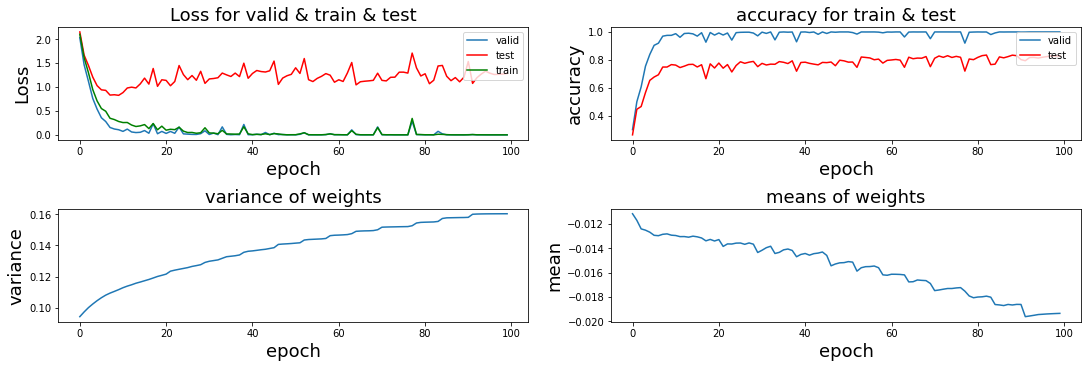

In [114]:
weight1_mean,weight1_var= mean_var(weights1,epochs)
weight2_mean,weight2_var= mean_var(weights2,epochs)
weight3_mean,weight3_var= mean_var(weights3,epochs)
weight4_mean,weight4_var= mean_var(weights4,epochs)

fig, axs = plt.subplots(2, 2,figsize=(15,5),constrained_layout=True)

axs[0,0].plot(range(epoch+1),plot_valid, label='valid')
axs[0,0].plot(range(epoch+1),plot_test,color='r', label='test')
axs[0,0].plot(range(epoch+1),plot_train,color='g', label='train')
axs[0,0].legend(loc="upper right")
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid & train & test', fontsize=18)

axs[0,1].plot(range(epoch+1),accuracy_valid_org, label='valid')
axs[0,1].plot(range(epoch+1),accuracy_test_org,color='r', label='test')
axs[0,1].legend(loc="upper right")
axs[0, 1].set_xlabel('epoch', fontsize=18)
axs[ 0,1].set_ylabel('accuracy', fontsize=18)
axs[ 0,1].set_title('accuracy for train & test', fontsize=18)

axs[1,0].plot(range(epochs),weight1_var[0,:]+weight2_var[0,:]+weight3_var[0,:]+weight4_var[0,:])
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('variance', fontsize=18)
axs[1,0].set_title('variance of weights', fontsize=18)

axs[ 1,1].plot(range(epochs),weight1_mean[0,:]+weight2_mean[0,:]+weight3_mean[0,:]+weight4_mean[0,:])
axs[ 1,1].set_xlabel('epoch', fontsize=18)
axs[ 1,1].set_ylabel('mean', fontsize=18)
axs[1, 1].set_title('means of weights', fontsize=18)

### we can see the diffirence between test and train 

In [115]:
f_test={input_image:x_test , 
            output_image:y_test_hot}
print('--------------------------------------------------')
print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
print('--------------------------------------------------')

--------------------------------------------------
 Test Loss:1.28 	 Test Accuracy=0.8277
--------------------------------------------------


---
# **b.4.conclusion**
>> *   Batch size=128
*   starter_learning_rate=0.001 
*num_hidden_layer1=1024
*num_hidden_layer2=700
*num_hidden_layer3=400

Loss               | Accuracy      
-------------------|------------------
test:    1.28     | 0.8277
Valid :0.03  | 0.9984

###we give the **best** result in this model.
### as we see, the variance of weights is ascending per epochs and the mean of weights is descending.
### if we pay attention to test accuracy in each epoch, we figure out reach to approximately 80% in epoch 40.
### notice that, with each structure, the result with the ADAM optimizer is better than the SGD optimizer.
# so the best result that we reach is **83%** for test data.  
---
---

# b.5 Fifth model: three layer(2-hidden & 1-output) MLP & SGD optimizer
### show that SGD optimizer is not good in comparison to ADAM optimizer.

In [ ]:
starter_learning_rate=0.01  
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
num_hidden_layer2=512

LR=0.001
batchsize=256
epochs=45
normal_std=0.002

In [ ]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')

FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)


FC2,weight2=FC(FC1, num_hidden_layer2, 'FC2',Stddev, relu=True)


stddev=(1/tf.sqrt(float(num_hidden_layer5)))
FC6,weight6=FC(FC2, num_class, 'FC6',Stddev, relu=False)
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())

In [ ]:
loss_GSD= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC6,
                                            name='LOSS_GSD'))
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 10, 0.85, staircase=True)
GSD=tf.train.GradientDescentOptimizer (
   learning_rate=learning_rate, name='GSD'
).minimize(loss_GSD)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC6,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC6,axis=1),tf.argmax(output_image,axis=1))))
loss_GSD_tensorboard=tf.summary.scalar('Loss Tensorboard', loss_GSD)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)



INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


In [ ]:
sess = tf.InteractiveSession()
plot_valid=[]
plot_train=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(GSD,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss_GSD,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss_GSD,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss_GSD,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    f_test={input_image:x_test , 
            output_image:y_test_hot}
    print('--------------------------------------------------')
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss_GSD,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    plot_valid.append(sess.run(loss_GSD,feed_dict=f_valid))
    plot_train.append(sess.run(loss_GSD,feed_dict=f))
    

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.61 	 Training Accuracy=0.0430 
iter 50: 	 Loss=3.16 	 Training Accuracy=0.0664 
--------------------------------------------------
Epoch:0 	 Validation Loss:3.17 	 Validation Accuracy=0.0641
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.20 	 Test Accuracy=0.0337
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:3.15 	 Validation Accuracy=0.0971
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.19 	 Test Accuracy=0.0537
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:3.14 	 Validation Accuracy=0.1121
---------------------------------

# b.5.conclusion #
as we see, we try with different models. the best result occurs in the [**fourth model**](https://colab.research.google.com/drive/11WDodQWdK-RTZA32vMQ3f6ASbyRjlOTv#scrollTo=2R0eFS1Ir6u7&line=2&uniqifier=1) when we use **ADAM & four hidden layers**. 

also, we add noise and rotate some random data to forgive better answers.

---
---

# **section d**: add dropout

In [89]:
starter_learning_rate=0.001
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
num_hidden_layer2=700
num_hidden_layer3=400


LR=0.0009
batchsize=128
epochs=100
normal_std=0.002

In [90]:
tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)

stddev=(1/tf.sqrt(float(input_size)))
FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)
FC1_1 = tf.nn.dropout(FC1, keep_prob)

stddev=(1/tf.sqrt(float(num_hidden_layer1)))
FC2,weight2=FC(FC1_1, num_hidden_layer2, 'FC2',Stddev, relu=True)
FC2_1 = tf.nn.dropout(FC2, keep_prob)

stddev=(1/tf.sqrt(float(num_hidden_layer2)))
FC3,weight3=FC(FC2_1, num_hidden_layer3, 'FC3',Stddev, relu=True)
FC3_1 = tf.nn.dropout(FC3, keep_prob)



stddev=(1/tf.sqrt(float(num_hidden_layer3)))
FC4,weight4=FC(FC3_1, num_class, 'FC4',Stddev, relu=False)
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')
tf.summary.FileWriter('./graphs', tf.get_default_graph())

In [91]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC4,
                                            name='LOSS'))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
adam=tf.train.AdamOptimizer(
    learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=True,
    name='Adam'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC4,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC4,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


In [92]:
sess = tf.InteractiveSession()
dropout_prob = 0.5
plot_valid_dropout=[]
plot_train_dropout=[]
plot_test_dropout=[]
weights1_dropout=[]
weights2_dropout=[]
weights3_dropout=[]
weights4_dropout=[]
accuracy_train_dropout=[]
accuracy_test_dropout=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] ,
                        keep_prob:dropout_prob}
        sess.run(adam,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot,keep_prob:1}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    f_test={input_image:x_test , 
            output_image:y_test_hot,keep_prob:1}
    print('--------------------------------------------------')
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    #plot_weights()
    plot_valid_dropout.append(sess.run(loss,feed_dict=f_valid))
    plot_train_dropout.append(sess.run(loss,feed_dict=f))
    plot_test_dropout.append(sess.run(loss,feed_dict=f_test))
    accuracy_train_dropout.append(sess.run(accuracy,feed_dict=f_valid))
    accuracy_test_dropout.append(sess.run(accuracy,feed_dict=f_test))
    weights1_dropout.append(sess.run(weight1,feed_dict=f_valid))
    weights2_dropout.append(sess.run(weight2,feed_dict=f_valid))
    weights3_dropout.append(sess.run(weight3,feed_dict=f_valid))
    weights4_dropout.append(sess.run(weight4,feed_dict=f_valid))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.29 	 Training Accuracy=0.0391 
iter 50: 	 Loss=3.18 	 Training Accuracy=0.0391 
iter 100: 	 Loss=3.05 	 Training Accuracy=0.0859 
--------------------------------------------------
Epoch:0 	 Validation Loss:2.63 	 Validation Accuracy=0.1586
--------------------------------------------------
--------------------------------------------------
 Test Loss:2.72 	 Test Accuracy=0.1392
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:2.00 	 Validation Accuracy=0.3176
--------------------------------------------------
--------------------------------------------------
 Test Loss:2.12 	 Test Accuracy=0.2496
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:1.81 	 Validation

Text(0.5, 1.0, 'means of weights after & before dropout')

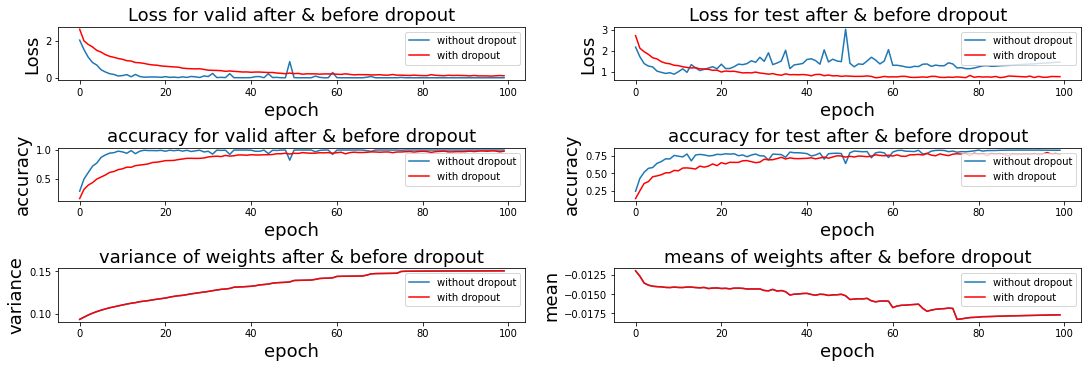

In [94]:
weight1_mean_dropout,weight1_var_dropout= mean_var(weights1,epochs)
weight2_mean_dropout,weight2_var_dropout= mean_var(weights2,epochs)
weight3_mean_dropout,weight3_var_dropout= mean_var(weights3,epochs)
weight4_mean_dropout,weight4_var_dropout= mean_var(weights4,epochs)

fig, axs = plt.subplots(3, 2,figsize=(15,5),constrained_layout=True)

axs[0,0].plot(range(epoch+1),plot_valid, label='without dropout')
axs[0,0].plot(range(epoch+1),plot_valid_dropout,color='r', label='with dropout')
axs[0,0].legend(loc="upper right")
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid after & before dropout', fontsize=18)

axs[0,1].plot(range(epoch+1),plot_test, label='without dropout')
axs[0,1].plot(range(epoch+1),plot_test_dropout,color='r', label='with dropout')
axs[0,1].legend(loc="upper right")
axs[0,1].set_xlabel('epoch', fontsize=18)
axs[0,1].set_ylabel('Loss', fontsize=18)
axs[0,1].set_title('Loss for test after & before dropout', fontsize=18)

axs[1,0].plot(range(epoch+1),accuracy_valid_org, label='without dropout')
axs[1,0].plot(range(epoch+1),accuracy_train_dropout,color='r', label='with dropout')
axs[1,0].legend(loc="upper right")
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('accuracy', fontsize=18)
axs[1,0].set_title('accuracy for valid after & before dropout', fontsize=18)

axs[1,1].plot(range(epoch+1),accuracy_test_org, label='without dropout')
axs[1,1].plot(range(epoch+1),accuracy_test_dropout,color='r', label='with dropout')
axs[1,1].legend(loc="upper right")
axs[1,1].set_xlabel('epoch', fontsize=18)
axs[1,1].set_ylabel('accuracy', fontsize=18)
axs[1,1].set_title('accuracy for test after & before dropout', fontsize=18)

axs[2,0].plot(range(epochs),weight1_var[0,:]+weight2_var[0,:]+weight3_var[0,:]+weight4_var[0,:],label='without dropout')
axs[2,0].plot(range(epochs),weight2_var_dropout[0,:]+weight2_var_dropout[0,:]+weight2_var_dropout[0,:]+weight2_var_dropout[0,:],color='r',label='with dropout')
axs[2,0].legend(loc="upper right")
axs[2,0].set_xlabel('epoch', fontsize=18)
axs[2,0].set_ylabel('variance', fontsize=18)
axs[2,0].set_title('variance of weights after & before dropout', fontsize=18)

axs[2,1].plot(range(epochs),weight1_mean[0,:]+weight2_mean[0,:]+weight3_mean[0,:]+weight4_mean[0,:],label='without dropout')
axs[2,1].plot(range(epochs),weight3_mean_dropout[0,:]+weight3_mean_dropout[0,:]+weight3_mean_dropout[0,:]+weight3_mean_dropout[0,:],color='r',label='with dropout')
axs[2,1].legend(loc="upper right")
axs[2,1].set_xlabel('epoch', fontsize=18)
axs[2,1].set_ylabel('mean', fontsize=18)
axs[2,1].set_title('means of weights after & before dropout', fontsize=18)

In [95]:
 f_test={input_image:x_test , 
            output_image:y_test_hot,keep_prob:1}
print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))

 Test Loss:0.76 	 Test Accuracy=0.7642


# **d.conclusion**:
## in general, if our model is too complicated, dropout can help us a lot. but, in this case, our model isn't very complicated so as we can see the dropout has not positive effects
## and we see the test accuracy is less than withot dropout layer, and the loss is less then too. 
## also we can see the dropout didn't any effect on final weights!
---
---

# **section e**: add batch normalization and try with deeper MLP

In [96]:
starter_learning_rate=0.001
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
num_hidden_layer2=1024
num_hidden_layer3=512
num_hidden_layer4=128
num_hidden_layer5=128
num_hidden_layer6=32
LR=0.0009
batchsize=256
epochs=100
normal_std=0.002

## graph

tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')


stddev=(1/tf.sqrt(float(input_size)))
FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)
FC1_norm = tf.layers.batch_normalization(FC1)

stddev=(1/tf.sqrt(float(num_hidden_layer1)))
FC2,weight2=FC(FC1_norm, num_hidden_layer2, 'FC2',Stddev, relu=True)
FC2_norm = tf.layers.batch_normalization(FC2)

stddev=(1/tf.sqrt(float(num_hidden_layer2)))
FC3,weight3=FC(FC2_norm, num_hidden_layer3, 'FC3',Stddev, relu=True)
FC3_norm = tf.layers.batch_normalization(FC3)

stddev=(1/tf.sqrt(float(num_hidden_layer3)))
FC4,weight4=FC(FC3, num_hidden_layer4, 'FC4',Stddev, relu=True)
FC4_norm = tf.layers.batch_normalization(FC4)

stddev=(1/tf.sqrt(float(num_hidden_layer4)))
FC5,weight5=FC(FC4_norm, num_hidden_layer5, 'FC5',Stddev, relu=True)
FC5_norm = tf.layers.batch_normalization(FC5)

stddev=(1/tf.sqrt(float(num_hidden_layer5)))
FC6,weight6=FC(FC5_norm, num_hidden_layer6, 'FC6',Stddev, relu=True)
FC6_norm = tf.layers.batch_normalization(FC6)


stddev=(1/tf.sqrt(float(num_hidden_layer6)))
FC7,weight7=FC(FC6_norm, num_hidden_layer6, 'FC7',Stddev, relu=True)
FC7_norm = tf.layers.batch_normalization(FC7)


stddev=(1/tf.sqrt(float(num_hidden_layer5)))
FC8,weight8=FC(FC7, num_class, 'FC8',Stddev, relu=False)

tf.summary.FileWriter('./graphs', tf.get_default_graph())

Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.


In [97]:
loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC8,
                                            name='LOSS'))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
adam=tf.train.AdamOptimizer(
    learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=True,
    name='Adam'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC8,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC8,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


In [98]:
sess = tf.InteractiveSession()
plot_valid_batch=[]
plot_train_batch=[]
plot_test_batch=[]
accuracy_train_batch=[]
accuracy_test_batch=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    f_test={input_image:x_test , 
            output_image:y_test_hot}
    print('--------------------------------------------------')
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    #plot_weights()
    plot_valid_batch.append(sess.run(loss,feed_dict=f_valid))
    plot_train_batch.append(sess.run(loss,feed_dict=f))
    plot_test_batch.append(sess.run(loss,feed_dict=f))
    accuracy_train_batch.append(sess.run(accuracy,feed_dict=f_valid))
    accuracy_test_batch.append(sess.run(accuracy,feed_dict=f_test))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=3.48 	 Training Accuracy=0.0391 
iter 50: 	 Loss=3.18 	 Training Accuracy=0.0508 
--------------------------------------------------
Epoch:0 	 Validation Loss:3.17 	 Validation Accuracy=0.0457
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.20 	 Test Accuracy=0.0395
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:3.08 	 Validation Accuracy=0.0789
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.16 	 Test Accuracy=0.0694
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:2.82 	 Validation Accuracy=0.0939
---------------------------------

## without batch:

In [99]:
starter_learning_rate=0.001
#LR= tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)  
input_size=len(x_train[0])
Stddev=0.025
num_class=25
num_hidden_layer1=1024
num_hidden_layer2=1024
num_hidden_layer3=512
num_hidden_layer4=128
num_hidden_layer5=128
num_hidden_layer6=32
LR=0.0009
batchsize=256
epochs=100
normal_std=0.002

tf.reset_default_graph()
input_image=tf.placeholder(dtype=tf.float32, shape=(None,input_size),
                           name='INPUT')
output_image=tf.placeholder(dtype=tf.float32, shape=(None, num_class),
                           name='OUTPUT')


stddev=(1/tf.sqrt(float(input_size)))
FC1,weight1=FC(input_image, num_hidden_layer1, 'FC1',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer1)))
FC2,weight2=FC(FC1, num_hidden_layer2, 'FC2',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer2)))
FC3,weight3=FC(FC2, num_hidden_layer3, 'FC3',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer3)))
FC4,weight4=FC(FC3, num_hidden_layer4, 'FC4',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer4)))
FC5,weight5=FC(FC4, num_hidden_layer5, 'FC5',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer5)))
FC6,weight6=FC(FC5, num_hidden_layer6, 'FC6',Stddev, relu=True)


stddev=(1/tf.sqrt(float(num_hidden_layer6)))
FC7,weight7=FC(FC6, num_hidden_layer6, 'FC7',Stddev, relu=True)

stddev=(1/tf.sqrt(float(num_hidden_layer5)))
FC8,weight8=FC(FC7, num_class, 'FC8',Stddev, relu=False)

tf.summary.FileWriter('./graphs', tf.get_default_graph())
#logdir = os.path.join("logs",  tf.get_default_graph())

loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=output_image, logits= FC8,
                                            name='LOSS'))

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
adam=tf.train.AdamOptimizer(
    learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08, use_locking=True,
    name='Adam'
).minimize(loss)

accuracy=tf.reduce_mean(tf.cast(tf.math.equal(tf.argmax(FC8,axis=1),tf.argmax(output_image,axis=1)),dtype=tf.float32))
find_misclass=tf.where(tf.math.logical_not(tf.math.equal(tf.argmax(FC8,axis=1),tf.argmax(output_image,axis=1))))

loss_tensorboard=tf.summary.scalar('Loss Tensorboard', loss)
accuracy_tb=tf.summary.scalar('Accuracy Tensorboard', accuracy)
weights_sum=tf.summary.histogram ('histogram of weights', weight1)

INFO:tensorflow:Summary name Loss Tensorboard is illegal; using Loss_Tensorboard instead.
INFO:tensorflow:Summary name Accuracy Tensorboard is illegal; using Accuracy_Tensorboard instead.
INFO:tensorflow:Summary name histogram of weights is illegal; using histogram_of_weights instead.


In [100]:
sess = tf.InteractiveSession()
plot_valid_withoutbatch=[]
plot_train_withoutbatch=[]
plot_test_withoutbatch=[]
accuracy_train_withoutbatch=[]
accuracy_test_withoutbatch=[]
write = tf.summary.FileWriter('./graphs', sess.graph)
sess.run(tf.global_variables_initializer())
for epoch in range(0,epochs):
    print('==================================================')
    print('=================== Epoch=%s ===================== ' %(epoch))
    for i in range(math.floor(num_train/batchsize)):
        f={input_image:x_train_shaffle[i*batchsize : (i+1)*batchsize] , 
          output_image:y_train_shaffle[i*batchsize : (i+1)*batchsize] }
        sess.run(adam,feed_dict=f)
        if i%50==0 and epoch%10==0:
            print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f} '.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    f_valid={input_image:x_valid , 
            output_image:y_valid_hot}
    if epoch==epochs-1:
       print('iter {}: \t Loss={:.2f} \t Training Accuracy={:.4f}'.format(i,sess.run(loss,feed_dict=f),sess.run(accuracy,feed_dict=f)))
    print('--------------------------------------------------')
    print('Epoch:{} \t Validation Loss:{:.2f} \t Validation Accuracy={:.4f}'.format(epoch,sess.run(loss,feed_dict=f_valid),sess.run(accuracy,feed_dict=f_valid)))
    print('--------------------------------------------------')
    f_test={input_image:x_test , 
            output_image:y_test_hot}
    print('--------------------------------------------------')
    print(' Test Loss:{:.2f} \t Test Accuracy={:.4f}'.format(sess.run(loss,feed_dict=f_test),sess.run(accuracy,feed_dict=f_test)))
    print('--------------------------------------------------')
    #plot_weights()
    plot_valid_withoutbatch.append(sess.run(loss,feed_dict=f_valid))
    plot_train_withoutbatch.append(sess.run(loss,feed_dict=f))
    plot_test_withoutbatch.append(sess.run(loss,feed_dict=f_test))
    accuracy_train_withoutbatch.append(sess.run(accuracy,feed_dict=f_valid))
    accuracy_test_withoutbatch.append(sess.run(accuracy,feed_dict=f_test))
    write.add_summary(sess.run(loss_tensorboard,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(accuracy_tb,feed_dict=f_valid),epoch)
    write.add_summary(sess.run(weights_sum,feed_dict=f_valid),epoch)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


=================== Epoch=0 ===================== 
iter 0: 	 Loss=4.02 	 Training Accuracy=0.0000 
iter 50: 	 Loss=3.21 	 Training Accuracy=0.0352 
--------------------------------------------------
Epoch:0 	 Validation Loss:3.19 	 Validation Accuracy=0.0454
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.24 	 Test Accuracy=0.0342
--------------------------------------------------
=================== Epoch=1 ===================== 
--------------------------------------------------
Epoch:1 	 Validation Loss:3.14 	 Validation Accuracy=0.0346
--------------------------------------------------
--------------------------------------------------
 Test Loss:3.19 	 Test Accuracy=0.0364
--------------------------------------------------
=================== Epoch=2 ===================== 
--------------------------------------------------
Epoch:2 	 Validation Loss:3.03 	 Validation Accuracy=0.0483
---------------------------------

Text(0.5, 1.0, 'accuracy for test after & before batch normalization')

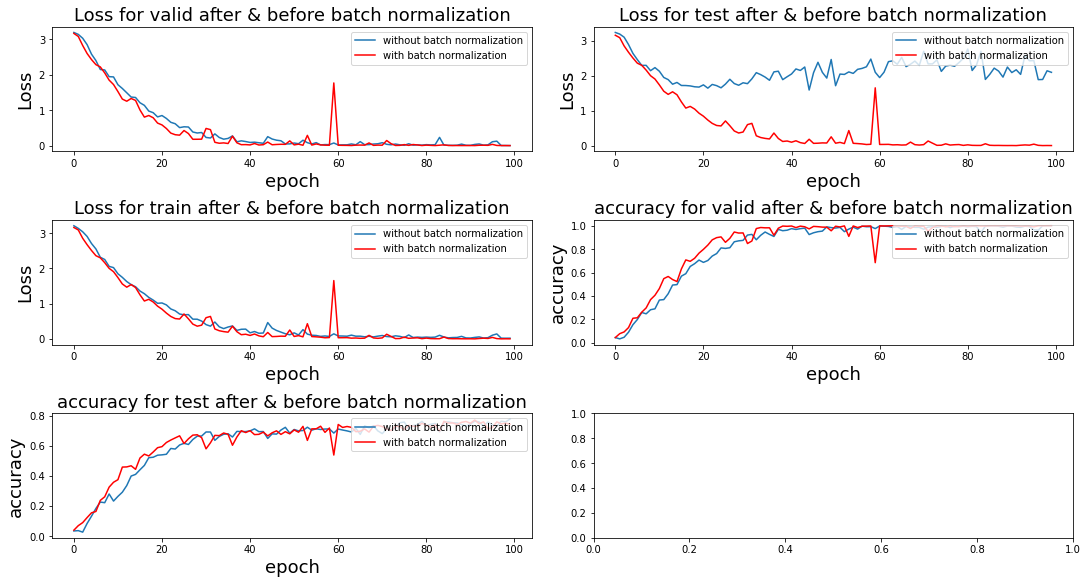

In [103]:
fig, axs = plt.subplots(3, 2,figsize=(15,8),constrained_layout=True)


axs[0,0].plot(range(epoch+1),plot_valid_withoutbatch, label='without batch normalization')
axs[0,0].plot(range(epoch+1),plot_valid_batch,color='r', label='with batch normalization')
axs[0,0].legend(loc="upper right")
axs[0,0].set_xlabel('epoch', fontsize=18)
axs[0,0].set_ylabel('Loss', fontsize=18)
axs[0,0].set_title('Loss for valid after & before batch normalization', fontsize=18)

axs[0,1].plot(range(epoch+1),plot_test_withoutbatch, label='without batch normalization')
axs[0,1].plot(range(epoch+1),plot_test_batch,color='r', label='with batch normalization')
axs[0,1].legend(loc="upper right")
axs[0,1].set_xlabel('epoch', fontsize=18)
axs[0,1].set_ylabel('Loss', fontsize=18)
axs[0,1].set_title('Loss for test after & before batch normalization', fontsize=18)

axs[1,0].plot(range(epoch+1),plot_train_withoutbatch, label='without batch normalization')
axs[1,0].plot(range(epoch+1),plot_train_batch,color='r', label='with batch normalization')
axs[1,0].legend(loc="upper right")
axs[1,0].set_xlabel('epoch', fontsize=18)
axs[1,0].set_ylabel('Loss', fontsize=18)
axs[1,0].set_title('Loss for train after & before batch normalization', fontsize=18)

axs[1,1].plot(range(epoch+1),accuracy_train_withoutbatch, label='without batch normalization')
axs[1,1].plot(range(epoch+1),accuracy_train_batch,color='r', label='with batch normalization')
axs[1,1].legend(loc="upper right")
axs[1,1].set_xlabel('epoch', fontsize=18)
axs[1,1].set_ylabel('accuracy', fontsize=18)
axs[1,1].set_title('accuracy for valid after & before batch normalization', fontsize=18)

axs[2,0].plot(range(epoch+1),accuracy_test_withoutbatch, label='without batch normalization')
axs[2,0].plot(range(epoch+1),accuracy_test_batch,color='r', label='with batch normalization')
axs[2,0].legend(loc="upper right")
axs[2,0].set_xlabel('epoch', fontsize=18)
axs[2,0].set_ylabel('accuracy', fontsize=18)
axs[2,0].set_title('accuracy for test after & before batch normalization', fontsize=18)


# **e.conclusion**:
## as we can see, the value of the lost function with batch normalization is  less than when we didn't use.

# Section F

# section g
try with webcam

refrence :

https://colab.research.google.com/drive/1QnC7lV7oVFk5OZCm75fqbLAfD9qBy9bw?usp=sharing#scrollTo=Fj9YcAnsT4B_

In [105]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# first example:

<IPython.core.display.Javascript object>

Saved to photo.jpg


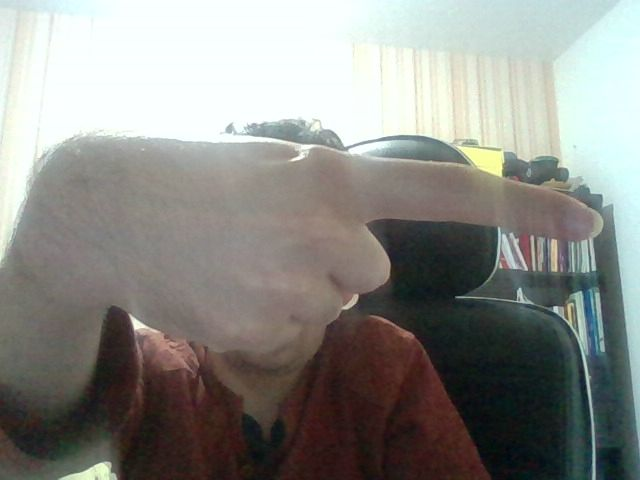

In [146]:
from IPython.display import Image
from matplotlib import pyplot as plt
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [147]:
import cv2
from google.colab.patches import cv2_imshow
arr=cv2.imread('photo.jpg')
gray = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
arr=img.reshape(1,784)/255.0
out=np.zeros((1,25))
#cv2_imshow(img)
alphabet=['A' , 'B','C','D','E','F','G','H','I','j','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
predicte=sess.run(FC4,feed_dict={'INPUT:0':arr ,'OUTPUT:0':out })
max_value = max(predicte[0])
max_index = np.where(predicte[0]==max_value)
alphabet[max_index[0][0]]

'P'

it is correct!!

# second example:

<IPython.core.display.Javascript object>

Saved to photo.jpg


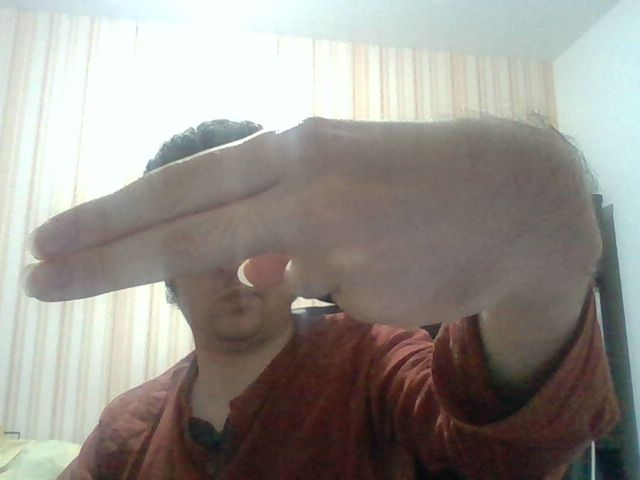

In [148]:
from IPython.display import Image
from matplotlib import pyplot as plt
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [149]:
arr=cv2.imread('photo.jpg')
gray = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
arr=img.reshape(1,784)/255.0
out=np.zeros((1,25))
#cv2_imshow(img)
alphabet=['A' , 'B','C','D','E','F','G','H','I','j','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
predicte=sess.run(FC4,feed_dict={'INPUT:0':arr ,'OUTPUT:0':out })
max_value = max(predicte[0])
max_index = np.where(predicte[0]==max_value)
alphabet[max_index[0][0]]

'H'

it is correct too!!

<IPython.core.display.Javascript object>

Saved to photo.jpg


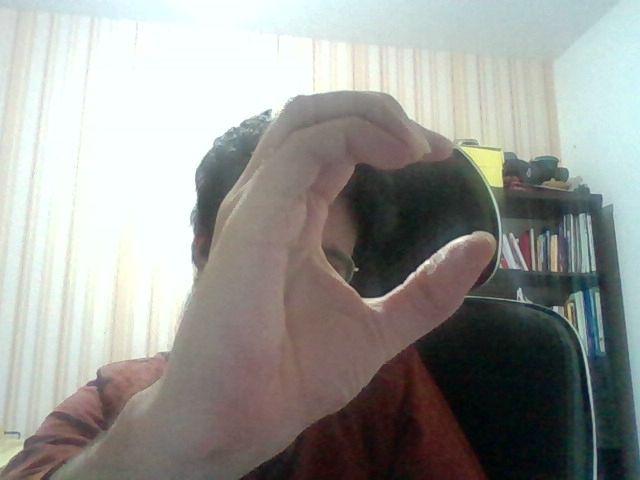

In [157]:
from IPython.display import Image
from matplotlib import pyplot as plt
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [158]:
arr=cv2.imread('photo.jpg')
gray = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
img = cv2.resize(gray, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
arr=img.reshape(1,784)/255.0
out=np.zeros((1,25))
#cv2_imshow(img)
alphabet=['A' , 'B','C','D','E','F','G','H','I','j','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
predicte=sess.run(FC4,feed_dict={'INPUT:0':arr ,'OUTPUT:0':out })
max_value = max(predicte[0])
max_index = np.where(predicte[0]==max_value)
alphabet[max_index[0][0]]

'H'

it is wrong answer :(

**thanks**